<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_fft_r4-xgbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-3-r4.csv?token=AKVFSODCGUQEJLFDLMTI2P26ZLKWC')
print(df.shape)
df

(76013, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,84,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,6,1,6,6,36,6,4,4,4,20,85,100,1
1,85,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,5,2,6,10,60,6,8,16,16,20,85,100,1
2,86,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,4,3,6,12,72,6,12,24,24,20,85,100,1
3,87,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,3,4,6,12,72,6,16,32,32,20,85,100,1
4,91,3,2,4,5,3,5,17,23,7,0,0,1,4,3,0.75,23,2,5,6,10,60,6,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76008,3268883,2,0,4,1,1,5,17,20,4,3,3,20043,4,0,0.00,5,5,7,11,35,385,0,4,4,80172,20,85,100,1
76009,3268884,2,0,4,2,2,5,17,20,4,3,3,20043,4,0,0.00,6,4,8,11,32,352,0,8,16,320688,20,85,100,1
76010,3268885,2,0,4,3,2,5,17,20,4,3,3,20043,4,0,0.00,7,3,9,11,27,297,0,12,24,481032,20,85,100,1
76011,3268886,2,0,4,4,2,5,17,20,4,3,3,20043,4,0,0.00,8,2,10,11,20,220,0,16,32,641376,20,85,100,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-1-r4.csv?token=AKVFSOCTZPYFOTR3BO7VOJK6ZLKWG')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-6-r4.csv?token=AKVFSOFVBLKLVWE3GR23WQC6ZLKWK')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-9-r4.csv?token=AKVFSOHAZPFWQTJHAVZ4M3K6ZLKWM')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-14-r4.csv?token=AKVFSOCJWBJRF5YXP26YUWS6ZLKWQ')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-5-r4.csv?token=AKVFSOCSMO3OEUCHJKXGL3S6ZLLTM')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-10-r4.csv?token=AKVFSOFVG7PHQBTJAQ3YYTS6ZLLTQ')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-12-r4.csv?token=AKVFSOEJ2RZSOXGFWDUUJEC6ZLLTU')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(103473, 30)
(105187, 30)
(101735, 30)
(101735, 30)
(78025, 30)
(74553, 30)
(82425, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,74,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,9,1,9,9,81,6,4,4,4,20,85,100,1
1,75,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,8,2,9,16,144,6,8,16,16,20,85,100,1
2,76,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,7,3,9,21,189,6,12,24,24,20,85,100,1
3,77,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,6,4,9,24,216,6,16,32,32,20,85,100,1
4,81,3,2,4,5,3,5,17,23,7,0,0,1,4,3,0.75,23,5,5,9,25,225,6,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723141,3272365,1,0,4,1,1,5,17,20,4,12,12,20048,2,0,0.00,5,5,8,12,40,480,0,4,4,80192,20,85,100,1
723142,3272366,1,0,4,2,2,5,17,20,4,12,12,20048,2,0,0.00,6,4,9,12,36,432,0,8,16,320768,20,85,100,1
723143,3272367,1,0,4,3,2,5,17,20,4,12,12,20048,2,0,0.00,7,3,10,12,30,360,0,12,24,481152,20,85,100,1
723144,3272368,1,0,4,4,2,5,17,20,4,12,12,20048,2,0,0.00,8,2,11,12,22,264,0,16,32,641536,20,85,100,1


In [8]:
df.shape

(723146, 30)

Test Data

In [9]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-2-r4.csv?token=AKVFSOC22BUJED46EF2DJJK6ZLLXG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-5-r4.csv?token=AKVFSODJ5TJSVEKC4PR4UWC6ZLLXK')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-10-r4.csv?token=AKVFSOASVI4FW3G6HELXJZC6ZLLXM')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-12-r4.csv?token=AKVFSOGTU3IQQJN2HVR63F26ZLLXQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-13-r4.csv?token=AKVFSODJEIW33OFURAFV6XK6ZLLXU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-15-r4.csv?token=AKVFSOC54MGSXKPTFOYWT6S6ZLLXY')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-10-r4.csv?token=AKVFSOD43QPO4RVFTLSYRQC6ZLL3I')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(103473, 30)
(105205, 30)
(101735, 30)
(109802, 30)
(101805, 30)
(101717, 30)
(74553, 30)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,92,1,3,1,1,4,3,9,3,3,24,8,4,5,4,0.80,20,1,1,1,1,1,3,1,4,16,3,27,9,0
1,106,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,12,1,12,12,144,6,4,4,4,20,85,100,0
2,107,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,11,2,12,22,264,6,8,16,16,20,85,100,0
3,108,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,10,3,12,30,360,6,12,24,24,20,85,100,0
4,109,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,9,4,12,36,432,6,16,32,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103468,3270399,2,0,4,1,1,5,19,20,4,3,3,30066,4,0,0.00,5,1,7,7,7,49,0,4,4,120264,20,95,100,0
103469,3270400,2,0,4,2,2,5,19,20,4,3,3,30066,4,0,0.00,6,4,1,4,4,16,0,8,16,481056,20,95,100,0
103470,3270401,2,0,4,3,2,5,19,20,4,3,3,30066,4,0,0.00,7,3,2,4,6,24,0,12,24,721584,20,95,100,0
103471,3270402,2,0,4,4,2,5,19,20,4,3,3,30066,4,0,0.00,8,2,3,4,6,24,0,16,32,962112,20,95,100,0


In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.740214,-0.257634,0.023723,-0.036975,0.715946,0.708257,0.004853,0.070211,-0.278003,-0.588133,-0.561305,-0.163408,0.069239,-0.064185,-0.056700,-0.059045,0.513660,-0.178876,-0.125720,-0.084034,0.401954,0.708850,0.663172,0.054611
inport,-0.740214,1.000000,0.287788,0.002179,-0.003394,-0.613679,-0.687897,0.032219,0.109181,0.637827,0.879208,0.696071,0.094024,-0.199884,-0.072153,-0.064581,-0.045601,0.114758,0.180362,0.130998,0.106030,-0.285076,-0.657045,-0.541308,-0.010899
cache_coherence_type,-0.257634,0.287788,1.000000,0.199255,-0.310526,-0.360992,-0.402504,0.022661,0.022073,0.195965,0.287034,0.062012,0.065899,-0.128060,-0.042368,-0.036803,-0.018621,-0.063885,0.472376,0.380309,0.274908,0.570057,-0.378973,0.018251,0.000382
flit_id,0.023723,0.002179,0.199255,1.000000,0.045924,0.214137,0.181525,0.002095,-0.016763,-0.000222,-0.000614,0.282582,-0.085131,0.123882,0.026412,0.006082,0.003244,0.022671,0.931424,0.893884,0.623220,0.365615,0.200770,0.310336,-0.000202
flit_type,-0.036975,-0.003394,-0.310526,0.045924,1.000000,-0.333725,-0.282900,-0.003268,0.026127,0.000348,0.000957,0.329042,-0.069919,0.107278,0.025464,0.013667,0.014119,-0.035335,-0.010849,0.247363,0.173831,-0.569793,-0.312894,-0.483646,0.000310
vnet,0.715946,-0.613679,-0.360992,0.214137,-0.333725,1.000000,0.974578,-0.033847,0.013445,-0.257941,-0.479334,-0.529690,-0.145639,0.088555,-0.038908,-0.040818,-0.050084,0.281668,-0.043452,-0.075640,-0.073410,0.560417,0.990852,0.925825,0.046311
vc,0.708257,-0.687897,-0.402504,0.181525,-0.282900,0.974578,1.000000,-0.038223,-0.031672,-0.357979,-0.581361,-0.564211,-0.132398,0.129131,-0.002227,-0.005716,-0.019409,0.180051,-0.078776,-0.099052,-0.091582,0.501154,0.995101,0.881745,0.033726
traversal_id,0.004853,0.032219,0.022661,0.002095,-0.003268,-0.033847,-0.038223,1.000000,0.050228,0.031735,0.023955,0.039137,0.077842,0.077908,0.106158,0.082489,0.067850,0.053713,0.008460,0.007529,0.564975,-0.009694,-0.037131,-0.027104,-0.297771
hop_count,0.070211,0.109181,0.022073,-0.016763,0.026127,0.013445,-0.031672,0.050228,1.000000,0.657604,0.220639,0.292454,-0.025495,-0.059550,-0.057967,-0.046457,-0.038145,0.395081,-0.023025,-0.007834,0.020896,0.031448,-0.017434,0.023360,-0.061954
current_hop,-0.278003,0.637827,0.195965,-0.000222,0.000348,-0.257941,-0.357979,0.031735,0.657604,1.000000,0.805575,0.646292,0.022697,-0.217201,-0.132573,-0.115613,-0.091914,0.369934,0.088755,0.072677,0.063807,-0.053214,-0.318839,-0.197125,0.003789


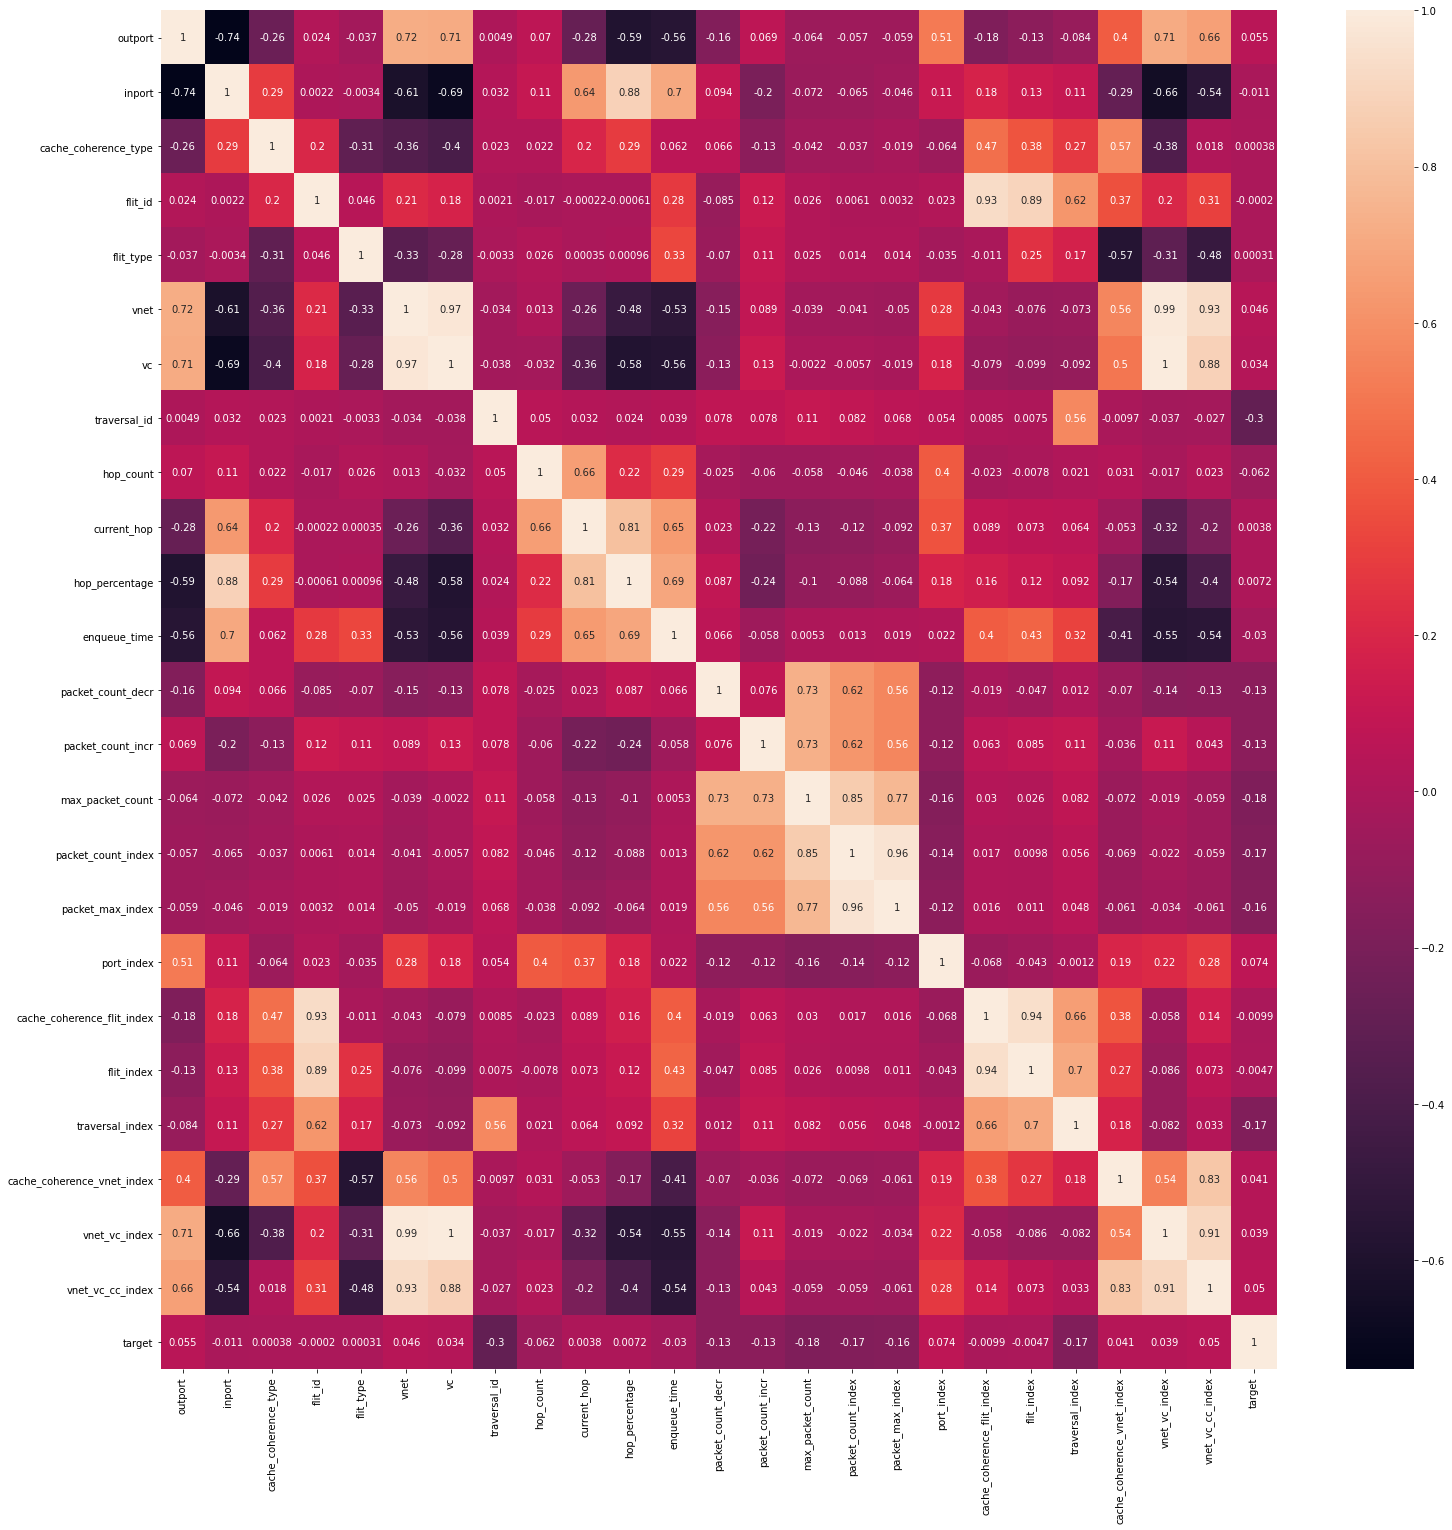

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,2,4,1,1,5,17,1,4,3,0.75,16,9,1,9,9,81,6,4,4,4,20,85,100
1,3,2,4,2,2,5,17,1,4,3,0.75,17,8,2,9,16,144,6,8,16,16,20,85,100
2,3,2,4,3,2,5,17,1,4,3,0.75,18,7,3,9,21,189,6,12,24,24,20,85,100
3,3,2,4,4,2,5,17,1,4,3,0.75,19,6,4,9,24,216,6,16,32,32,20,85,100
4,3,2,4,5,3,5,17,1,4,3,0.75,23,5,5,9,25,225,6,20,60,60,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723141,1,0,4,1,1,5,17,20048,2,0,0.00,5,5,8,12,40,480,0,4,4,80192,20,85,100
723142,1,0,4,2,2,5,17,20048,2,0,0.00,6,4,9,12,36,432,0,8,16,320768,20,85,100
723143,1,0,4,3,2,5,17,20048,2,0,0.00,7,3,10,12,30,360,0,12,24,481152,20,85,100
723144,1,0,4,4,2,5,17,20048,2,0,0.00,8,2,11,12,22,264,0,16,32,641536,20,85,100


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.162162,0.216216,0.000000,0.216216,0.021108,0.005541,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
1,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.175676,0.189189,0.027027,0.216216,0.039578,0.009904,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.189189,0.162162,0.054054,0.216216,0.052770,0.013020,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.202703,0.135135,0.081081,0.216216,0.060686,0.014890,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.256757,0.108108,0.108108,0.216216,0.063325,0.015514,1.0,0.655172,0.651163,0.000021,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723141,0.333333,0.000000,0.5,0.00,0.000000,1.0,0.727273,0.666279,0.2,0.0,0.00,0.013514,0.108108,0.189189,0.297297,0.102902,0.033174,0.0,0.103448,0.000000,0.029612,0.944444,0.794521,1.0
723142,0.333333,0.000000,0.5,0.25,0.333333,1.0,0.727273,0.666279,0.2,0.0,0.00,0.027027,0.081081,0.216216,0.297297,0.092348,0.029850,0.0,0.241379,0.139535,0.118454,0.944444,0.794521,1.0
723143,0.333333,0.000000,0.5,0.50,0.333333,1.0,0.727273,0.666279,0.2,0.0,0.00,0.040541,0.054054,0.243243,0.297297,0.076517,0.024863,0.0,0.379310,0.232558,0.177682,0.944444,0.794521,1.0
723144,0.333333,0.000000,0.5,0.75,0.333333,1.0,0.727273,0.666279,0.2,0.0,0.00,0.054054,0.027027,0.270270,0.297297,0.055409,0.018215,0.0,0.517241,0.325581,0.236910,0.944444,0.794521,1.0


In [17]:
train_X[train_X.duplicated()].shape

(18715, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [19]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000000,0.0001,0.8,0.8,0.80,0.225352,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000004,0.000000,0.000000,0.0
1,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0000,0.6,0.6,0.75,0.169014,0.305556,0.000000,0.305556,0.030556,0.010707,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.183099,0.277778,0.027778,0.305556,0.058333,0.019692,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.197183,0.250000,0.055556,0.305556,0.080556,0.026879,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.211268,0.222222,0.083333,0.305556,0.097222,0.032270,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103468,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.0000,0.6,0.0,0.00,0.014085,0.000000,0.166667,0.166667,0.016667,0.003594,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.0
103469,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.028169,0.083333,0.000000,0.083333,0.008333,0.001123,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.0
103470,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.042254,0.055556,0.027778,0.083333,0.013889,0.001722,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.0
103471,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.056338,0.027778,0.055556,0.083333,0.013889,0.001722,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.0


In [20]:
test_X[test_X.duplicated()].shape

(54, 24)

In [21]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(81, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.314286,0.000000,0.314286,0.032258,0.011616,1.000000,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,0.333333,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000133,0.2,0.2,0.50,0.069444,0.285714,0.028571,0.314286,0.061584,0.021363,0.333333,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
3,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.257143,0.057143,0.314286,0.085044,0.029161,1.000000,0.241379,0.139535,0.000004,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.228571,0.085714,0.314286,0.102639,0.035009,1.000000,0.379310,0.232558,0.000007,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105200,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.4,0.0,0.00,0.013889,0.114286,0.171429,0.285714,0.099707,0.031192,0.000000,0.068966,0.093023,0.133336,0.333333,0.041096,0.197802
105201,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,1.000000,0.6,0.0,0.00,0.027778,0.085714,0.200000,0.285714,0.090909,0.028511,0.000000,0.241379,0.139535,0.177782,0.944444,0.931507,1.000000
105202,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,1.000000,0.6,0.0,0.00,0.041667,0.057143,0.228571,0.285714,0.076246,0.024044,0.000000,0.379310,0.232558,0.266674,0.944444,0.931507,1.000000
105203,0.666667,0.000000,0.500000,0.75,0.333333,1.0,0.909091,1.000000,0.6,0.0,0.00,0.055556,0.028571,0.257143,0.285714,0.055718,0.017789,0.000000,0.517241,0.325581,0.355566,0.944444,0.931507,1.000000


In [22]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(39, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000000,0.0001,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000004,0.000000,0.000000,0.0
1,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0000,0.6,0.6,0.75,0.166667,0.294118,0.000000,0.294118,0.030960,0.010583,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.180556,0.264706,0.029412,0.294118,0.058824,0.019314,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.194444,0.235294,0.058824,0.294118,0.080495,0.026105,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.208333,0.205882,0.088235,0.294118,0.095975,0.030955,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101730,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.0000,0.6,0.0,0.00,0.013889,0.117647,0.029412,0.147059,0.027864,0.005203,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.0
101731,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.027778,0.088235,0.058824,0.147059,0.034056,0.006262,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.0
101732,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.041667,0.058824,0.088235,0.147059,0.034056,0.006262,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.0
101733,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.0000,0.6,0.0,0.00,0.055556,0.029412,0.117647,0.147059,0.027864,0.005203,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.0


In [23]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(48, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.135135,0.000000,0.135135,0.013193,0.002424,1.000000,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
1,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.180556,0.108108,0.027027,0.135135,0.023747,0.004086,1.000000,0.241379,0.139535,0.000004,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.081081,0.054054,0.135135,0.029024,0.004917,1.000000,0.379310,0.232558,0.000007,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.054054,0.081081,0.135135,0.029024,0.004917,1.000000,0.517241,0.325581,0.000010,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.5,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.263889,0.027027,0.108108,0.135135,0.023747,0.004086,1.000000,0.655172,0.651163,0.000021,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109797,0.333333,0.000000,0.5,0.25,0.333333,1.0,0.909091,0.999967,0.2,0.0,0.00,0.027778,0.081081,0.054054,0.135135,0.029024,0.004917,0.000000,0.241379,0.139535,0.177782,0.944444,0.931507,1.000000
109798,0.333333,0.000000,0.5,0.50,0.333333,1.0,0.909091,0.999967,0.2,0.0,0.00,0.041667,0.054054,0.081081,0.135135,0.029024,0.004917,0.000000,0.379310,0.232558,0.266674,0.944444,0.931507,1.000000
109799,0.333333,0.000000,0.5,0.75,0.333333,1.0,0.909091,0.999967,0.2,0.0,0.00,0.055556,0.027027,0.108108,0.135135,0.023747,0.004086,0.000000,0.517241,0.325581,0.355566,0.944444,0.931507,1.000000
109800,0.333333,0.000000,0.5,1.00,0.666667,1.0,0.909091,0.999967,0.2,0.0,0.00,0.111111,0.000000,0.135135,0.135135,0.013193,0.002424,0.000000,0.655172,0.651163,0.666688,0.944444,0.931507,1.000000


In [24]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(63, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000000,0.0001,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000004,0.000000,0.000000,0.0
1,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0000,0.6,0.6,0.75,0.166667,0.285714,0.000000,0.285714,0.029326,0.009747,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.180556,0.257143,0.028571,0.285714,0.055718,0.017789,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.194444,0.228571,0.057143,0.285714,0.076246,0.024044,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.208333,0.200000,0.085714,0.285714,0.090909,0.028511,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101800,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,1.0000,0.6,0.6,0.75,0.166667,0.114286,0.000000,0.114286,0.011730,0.001949,1.0,0.103448,0.000000,0.044449,0.944444,0.794521,1.0
101801,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,1.0000,0.6,0.6,0.75,0.180556,0.085714,0.028571,0.114286,0.020528,0.003168,1.0,0.241379,0.139535,0.177800,0.944444,0.794521,1.0
101802,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,1.0000,0.6,0.6,0.75,0.194444,0.057143,0.057143,0.114286,0.023460,0.003574,1.0,0.379310,0.232558,0.266701,0.944444,0.794521,1.0
101803,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,1.0000,0.6,0.6,0.75,0.208333,0.028571,0.085714,0.114286,0.020528,0.003168,1.0,0.517241,0.325581,0.355602,0.944444,0.794521,1.0


In [25]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(21, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000000,0.0001,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000004,0.000000,0.000000,0.0
1,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0000,0.6,0.6,0.75,0.166667,0.277778,0.000000,0.277778,0.027778,0.008985,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.180556,0.250000,0.027778,0.277778,0.052778,0.016397,1.0,0.241379,0.139535,0.000004,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.194444,0.222222,0.055556,0.277778,0.072222,0.022162,1.0,0.379310,0.232558,0.000007,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0000,0.6,0.6,0.75,0.208333,0.194444,0.083333,0.277778,0.086111,0.026280,1.0,0.517241,0.325581,0.000010,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101712,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.0000,0.8,0.0,0.00,0.013889,0.083333,0.111111,0.194444,0.052778,0.011905,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.0
101713,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.0000,0.8,0.0,0.00,0.027778,0.055556,0.138889,0.194444,0.047222,0.010707,0.0,0.241379,0.139535,0.177782,0.944444,0.931507,1.0
101714,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.0000,0.8,0.0,0.00,0.041667,0.027778,0.166667,0.194444,0.036111,0.008311,0.0,0.379310,0.232558,0.266674,0.944444,0.931507,1.0
101715,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.0000,0.8,0.0,0.00,0.055556,0.000000,0.194444,0.194444,0.019444,0.004717,0.0,0.517241,0.325581,0.355566,0.944444,0.931507,1.0


In [26]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(13, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.0,0.6,0.6,0.75,0.166667,0.137931,0.000000,0.137931,0.016736,0.003334,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
1,1.0,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.180556,0.103448,0.034483,0.137931,0.029289,0.005417,1.0,0.241379,0.139535,0.000007,0.944444,0.794521,1.0
2,1.0,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.194444,0.068966,0.068966,0.137931,0.033473,0.006112,1.0,0.379310,0.232558,0.000011,0.944444,0.794521,1.0
3,1.0,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.0,0.6,0.6,0.75,0.208333,0.034483,0.103448,0.137931,0.029289,0.005417,1.0,0.517241,0.325581,0.000016,0.944444,0.794521,1.0
4,1.0,0.666667,0.5,1.00,0.666667,1.0,0.727273,0.0,0.6,0.6,0.75,0.263889,0.000000,0.137931,0.137931,0.016736,0.003334,1.0,0.655172,0.651163,0.000031,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74548,1.0,0.666667,0.5,0.00,0.000000,1.0,0.727273,1.0,0.6,0.6,0.75,0.166667,0.137931,0.034483,0.172414,0.037657,0.008196,1.0,0.103448,0.000000,0.044449,0.944444,0.794521,1.0
74549,1.0,0.666667,0.5,0.25,0.333333,1.0,0.727273,1.0,0.6,0.6,0.75,0.180556,0.103448,0.068966,0.172414,0.046025,0.009862,1.0,0.241379,0.139535,0.177803,0.944444,0.794521,1.0
74550,1.0,0.666667,0.5,0.50,0.333333,1.0,0.727273,1.0,0.6,0.6,0.75,0.194444,0.068966,0.103448,0.172414,0.046025,0.009862,1.0,0.379310,0.232558,0.266705,0.944444,0.794521,1.0
74551,1.0,0.666667,0.5,0.75,0.333333,1.0,0.727273,1.0,0.6,0.6,0.75,0.208333,0.034483,0.137931,0.172414,0.037657,0.008196,1.0,0.517241,0.325581,0.355607,0.944444,0.794521,1.0


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

0    412130
1    311016
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  8561.257325
14            max_packet_count  3166.387599
20             traversal_index  2896.479861
15          packet_count_index  1943.366668
16            packet_max_index  1626.074354
13           packet_count_incr  1584.145407
12           packet_count_decr  1582.244365
17                  port_index  1551.932553
5                         vnet   724.264072
0                      outport   581.574814
8                    hop_count   424.448543
22               vnet_vc_index   407.583241
6                           vc   278.215761
23            vnet_vc_cc_index   237.685642
21  cache_coherence_vnet_index    78.871578
11                enqueue_time    74.120774
1                       inport    23.824990


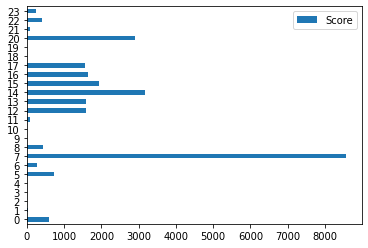

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 63.76729424942439
Test Prediction  63.63271796999239


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.7409759067583


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  68.62411482343995


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  72.54238954145575


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.22733647838837


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.72034772358921


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  74.46051299192858


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  34.1045967298432


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,6.701226
6,vc,4.507990
5,vnet,2.176888
17,port_index,2.141677
9,current_hop,2.088945
23,vnet_vc_cc_index,1.300271
11,enqueue_time,0.804004
21,cache_coherence_vnet_index,0.578687
3,flit_id,0.302494
4,flit_type,0.207364


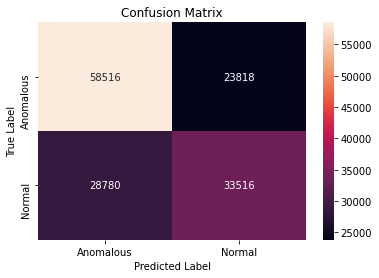

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     82334
           1       0.58      0.54      0.56     62296

    accuracy                           0.64    144630
   macro avg       0.63      0.62      0.63    144630
weighted avg       0.63      0.64      0.63    144630



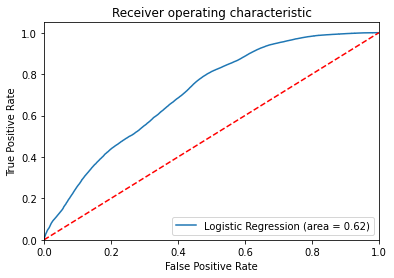

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

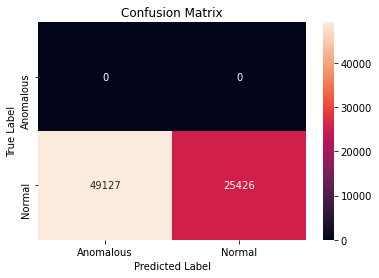

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51     74553

    accuracy                           0.34     74553
   macro avg       0.50      0.17      0.25     74553
weighted avg       1.00      0.34      0.51     74553



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.37064489141181
Test Prediction  79.58722256793196


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.2575744397089


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  70.17917399363148


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.15967955964024


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  67.35942879000383


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.57791856981484


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  82.22322718916209


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  32.472200984534496


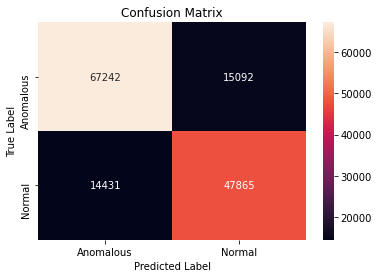

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     82334
           1       0.76      0.77      0.76     62296

    accuracy                           0.80    144630
   macro avg       0.79      0.79      0.79    144630
weighted avg       0.80      0.80      0.80    144630



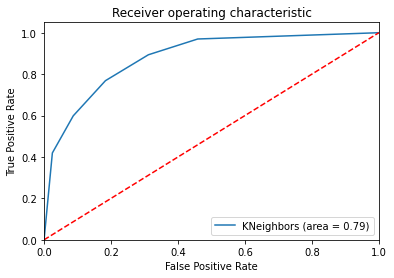

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

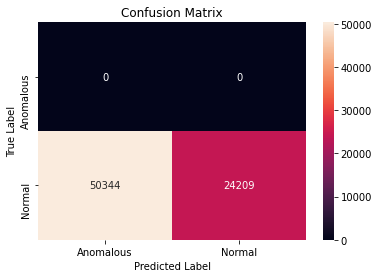

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.32      0.49     74553

    accuracy                           0.32     74553
   macro avg       0.50      0.16      0.25     74553
weighted avg       1.00      0.32      0.49     74553



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.73660884055065
Test Prediction Score 60.78890963147342


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 47.94584094401438


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.08141248039542


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.02083845284317


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.11843135826305


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.64977162221895


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.51516462341595


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.93872815312596


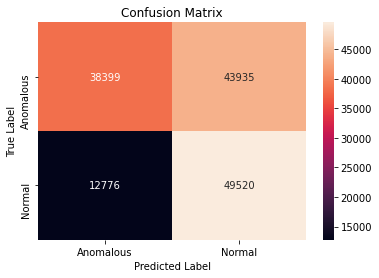

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.47      0.58     82334
           1       0.53      0.79      0.64     62296

    accuracy                           0.61    144630
   macro avg       0.64      0.63      0.61    144630
weighted avg       0.66      0.61      0.60    144630



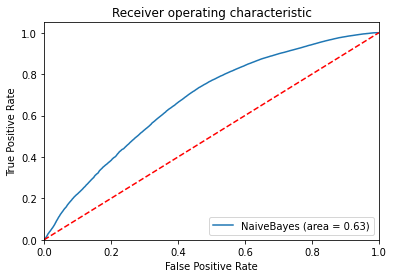

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 462812 samples, validate on 115704 samples
Epoch 1/10
462812/462812 [==============================] - 18s 39us/step - loss: 0.2166 - accuracy: 0.6344 - val_loss: 0.2129 - val_accuracy: 0.6441
Epoch 2/10
462812/462812 [==============================] - 17s 37us/step - loss: 0.2128 - accuracy: 0.6406 - val_loss: 0.2112 - val_accuracy: 0.6409
Epoch 3/10
462812/462812 [==============================] - 17s 37us/step - loss: 0.2119 - accuracy: 0.6406 - val_loss: 0.2118 - val_accuracy: 0.6473
Epoch 4/10
462812/462812 [==============================] - 18s 38us/step - loss: 0.2106 - accuracy: 0.6461 - val_loss: 0.2093 - val_accuracy: 0.6503
Epoch 5/10
462812/462812 [==============================] - 18s 39us/step - loss: 0.2090 - accuracy: 0.6521 - val_loss: 0.2077 - val_accuracy: 0.6522
Epoch 6/10
462812/462812 [==============================] - 17s 37us/step - loss: 0.2085 - accuracy: 0.6531 - val_loss: 0.2073 - val_accuracy: 0.6553
Epoch 7/10
462812/462812 [======================

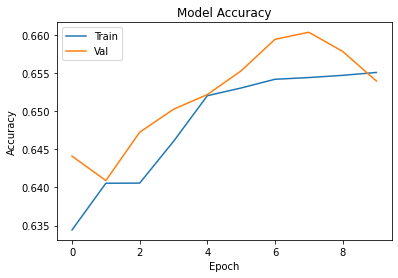

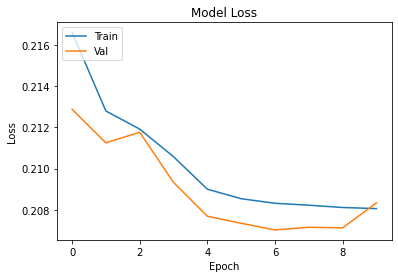

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.50%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.45%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.05%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.39%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.64%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.29%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 25.70%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 462812 samples, validate on 115704 samples
Epoch 1/30
462812/462812 [==============================] - 17s 36us/step - loss: 0.2307 - accuracy: 0.6017 - val_loss: 0.2166 - val_accuracy: 0.6388
Epoch 2/30
462812/462812 [==============================] - 17s 36us/step - loss: 0.2155 - accuracy: 0.6391 - val_loss: 0.2141 - val_accuracy: 0.6430
Epoch 3/30
462812/462812 [==============================] - 16s 35us/step - loss: 0.2142 - accuracy: 0.6410 - val_loss: 0.2133 - val_accuracy: 0.6421
Epoch 4/30
462812/462812 [==============================] - 17s 36us/step - loss: 0.2136 - accuracy: 0.6424 - val_loss: 0.2129 - val_accuracy: 0.6468
Epoch 5/30
462812/462812 [==============================] - 17s 36us/step - loss: 0.2133 - accuracy: 0.6436 - val_loss: 0.2123 - val_accuracy: 0.6456
Epoch 6/30
462812/462812 [==============================] - 17s 36us/step - loss: 0.2130 - accuracy: 0.6437 - val_loss: 0.2124 - val_accuracy: 0.6436
Epoch 7/30
462812/462812 [======================

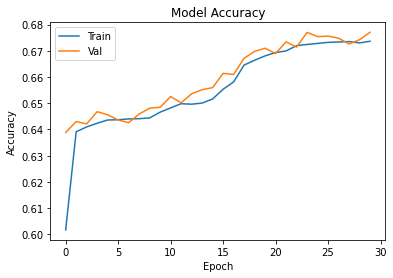

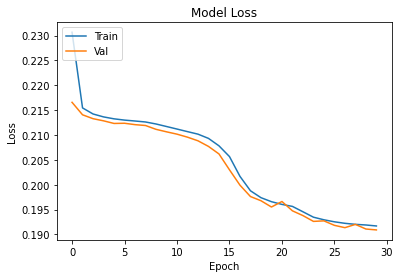

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.33%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.11%
accuracy: 64.21%
accuracy: 70.37%
accuracy: 62.64%
accuracy: 71.49%
accuracy: 71.20%
accuracy: 38.43%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 462812 samples, validate on 115704 samples
Epoch 1/30
462812/462812 [==============================] - 18s 38us/step - loss: 0.2216 - accuracy: 0.6232 - val_loss: 0.2120 - val_accuracy: 0.6475
Epoch 2/30
462812/462812 [==============================] - 18s 38us/step - loss: 0.2111 - accuracy: 0.6458 - val_loss: 0.2087 - val_accuracy: 0.6494
Epoch 3/30
462812/462812 [==============================] - 17s 38us/step - loss: 0.2085 - accuracy: 0.6514 - val_loss: 0.2066 - val_accuracy: 0.6570
Epoch 4/30
462812/462812 [==============================] - 17s 37us/step - loss: 0.2036 - accuracy: 0.6595 - val_loss: 0.2002 - val_accuracy: 0.6593
Epoch 5/30
462812/462812 [==============================] - 17s 38us/step - loss: 0.1997 - accuracy: 0.6629 - val_loss: 0.1982 - val_accuracy: 0.6640
Epoch 6/30
462812/462812 [==============================] - 20s 42us/step - loss: 0.1980 - accuracy: 0.6662 - val_loss: 0.1962 - val_accuracy: 0.6750
Epoch 7/30
462812/462812 [======================

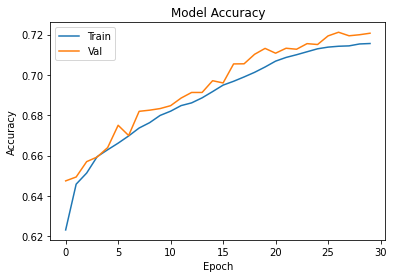

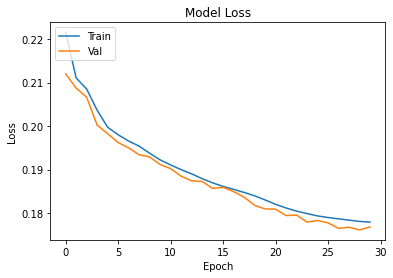

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.94%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.35%
accuracy: 63.26%
accuracy: 72.54%
accuracy: 62.42%
accuracy: 72.47%
accuracy: 70.84%
accuracy: 34.13%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 462812 samples, validate on 115704 samples
Epoch 1/100
462812/462812 [==============================] - 31s 68us/step - loss: 0.1947 - accuracy: 0.6788 - val_loss: 0.1792 - val_accuracy: 0.7157
Epoch 2/100
462812/462812 [==============================] - 32s 69us/step - loss: 0.1813 - accuracy: 0.7059 - val_loss: 0.1711 - val_accuracy: 0.7335
Epoch 3/100
462812/462812 [==============================] - 32s 69us/step - loss: 0.1760 - accuracy: 0.7188 - val_loss: 0.1632 - val_accuracy: 0.7456
Epoch 4/100
462812/462812 [==============================] - 32s 69us/step - loss: 0.1723 - accuracy: 0.7267 - val_loss: 0.1622 - val_accuracy: 0.7486
Epoch 5/100
462812/462812 [==============================] - 32s 69us/step - loss: 0.1701 - accuracy: 0.7306 - val_loss: 0.1586 - val_accuracy: 0.7587
Epoch 6/100
462812/462812 [==============================] - 32s 69us/step - loss: 0.1680 - accuracy: 0.7341 - val_loss: 0.1559 - val_accuracy: 0.7579
Epoch 7/100
462812/462812 [===============

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [33]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [35]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.5175587192057
Test Prediction Score 94.88971859226993


In [36]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 82.72109632464507
Test Prediction Score 76.07243001758471
Test Prediction Score 78.78704477318523
Test Prediction Score 76.51408899655743
Test Prediction Score 80.68562447816905
Test Prediction Score 85.60614253271332
Test Prediction Score 27.11493836599466


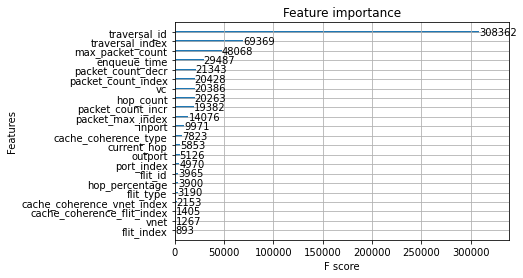

In [37]:
plot_importance(xgbc)
plt.show()

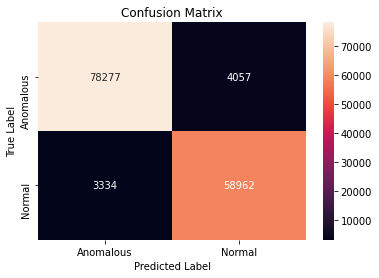

In [38]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     82334
           1       0.94      0.95      0.94     62296

    accuracy                           0.95    144630
   macro avg       0.95      0.95      0.95    144630
weighted avg       0.95      0.95      0.95    144630



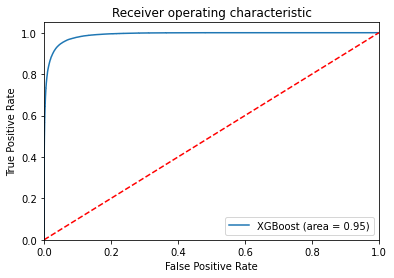

In [40]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [42]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [44]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.29427016711725
Test Prediction Score 84.63043628569453


In [45]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 77.83769679046708
Test Prediction Score 73.25222185257356
Test Prediction Score 75.76546911092544
Test Prediction Score 72.67809329520409
Test Prediction Score 76.33122145277737
Test Prediction Score 82.62532320064493
Test Prediction Score 29.253014633884618


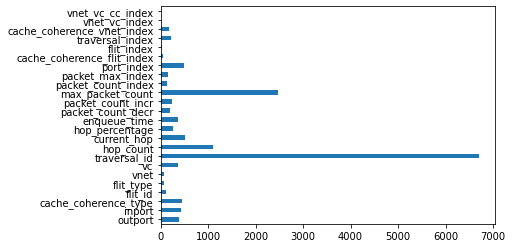

In [46]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

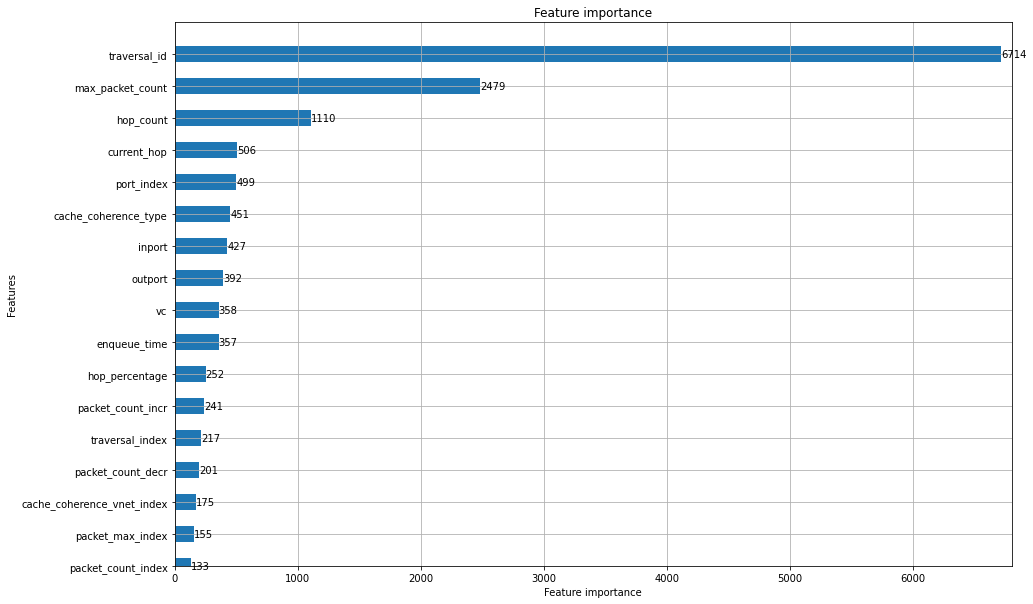

In [47]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [48]:
sorted(gbm.feature_importances_,reverse=True)

[6714,
 2479,
 1110,
 506,
 499,
 451,
 427,
 392,
 358,
 357,
 252,
 241,
 217,
 201,
 175,
 155,
 133,
 108,
 77,
 64,
 49,
 32,
 3,
 0]

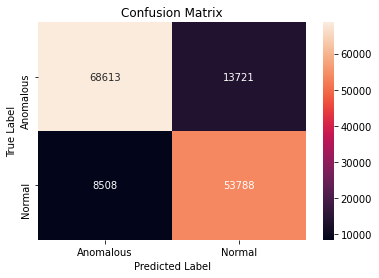

In [49]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     82334
           1       0.80      0.86      0.83     62296

    accuracy                           0.85    144630
   macro avg       0.84      0.85      0.84    144630
weighted avg       0.85      0.85      0.85    144630



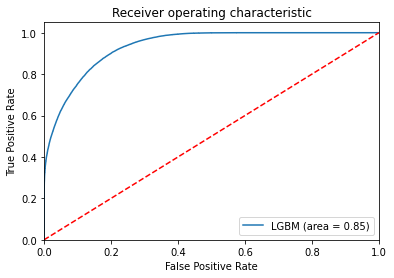

In [51]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()